In [28]:
import os
import sys
sys.path.insert(0, '../')

from lib.data_loader import Enabl3sDataLoader
from lib.preprocess import EMGPreprocessor

import numpy as np 
import matplotlib.pyplot as plt

In [35]:
DATA_ROOT = "../../data"
SUBJECT_ID = "AB156"
CHANNELS = ['TA', 'MG', 'RF', 'Mode', 'Ankle_Angle', 'Knee_Angle']

# Initialize Loader
fs = 500
window = slice(7 * fs, 10 * fs)  # 5 to 15 seconds
loader = Enabl3sDataLoader(DATA_ROOT, SUBJECT_ID, target_fs=fs)

# Load specific circuit
num_circuits = len(os.listdir(f"{DATA_ROOT}/{SUBJECT_ID}/Raw"))
range_circuits = range(1, 2 + 1)
df_raw = loader.load_dataset_batch(range_circuits, CHANNELS)
df_raw.head()

10:09:02 - INFO - Starting batch load: Circuits 1 to 2...
10:09:03 - INFO - Labels generated via Processed Events (Heel Contact + Toe Off). Swing Ratio: 57.07%
10:09:03 - INFO - Labels generated via Processed Events (Heel Contact + Toe Off). Swing Ratio: 33.32%
10:09:03 - INFO - Batch load complete. Total Shape: (31890, 9)


,TA,MG,RF,Ankle_Angle,Knee_Angle,Mode,Ankle_Norm,Circuit_ID,Label_Phase
0,-0.102846,-0.074235,-0.066148,2.116808,3.090944,0.0,0.438050,1.0,0.0
1,-0.079728,-0.053254,-0.052796,2.116808,3.090944,0.0,0.438050,1.0,0.0
2,-0.067216,-0.043183,-0.050736,2.115587,3.092164,0.0,0.438011,1.0,0.0
3,-0.062409,-0.037766,-0.050813,2.114366,3.093385,0.0,0.437973,1.0,0.0
4,-0.092851,-0.056077,-0.058747,2.114366,3.092164,0.0,0.437973,1.0,0.0


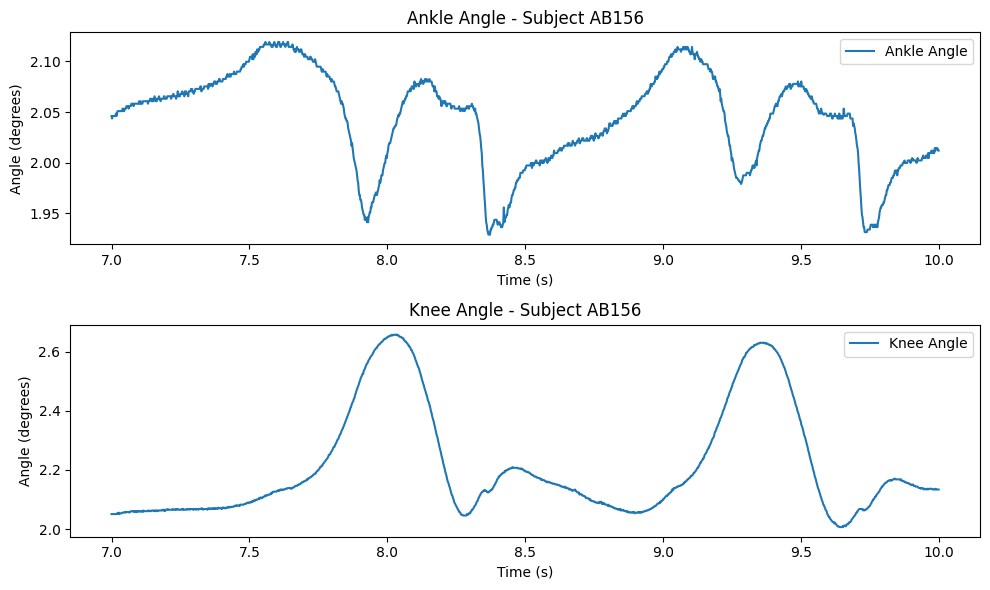

In [36]:
# Plot the ankle angle
time_axis = np.arange(len(df_raw)) / fs
ankle_angle = df_raw['Ankle_Angle'].values
knee_angle = df_raw['Knee_Angle'].values

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(time_axis[window], ankle_angle[window], label='Ankle Angle')
ax[0].set_title(f"Ankle Angle - Subject {SUBJECT_ID}")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Angle (degrees)")
ax[0].legend()

ax[1].plot(time_axis[window], knee_angle[window], label='Knee Angle')
ax[1].set_title(f"Knee Angle - Subject {SUBJECT_ID}")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Angle (degrees)")
ax[1].legend()

plt.tight_layout()
plt.show()

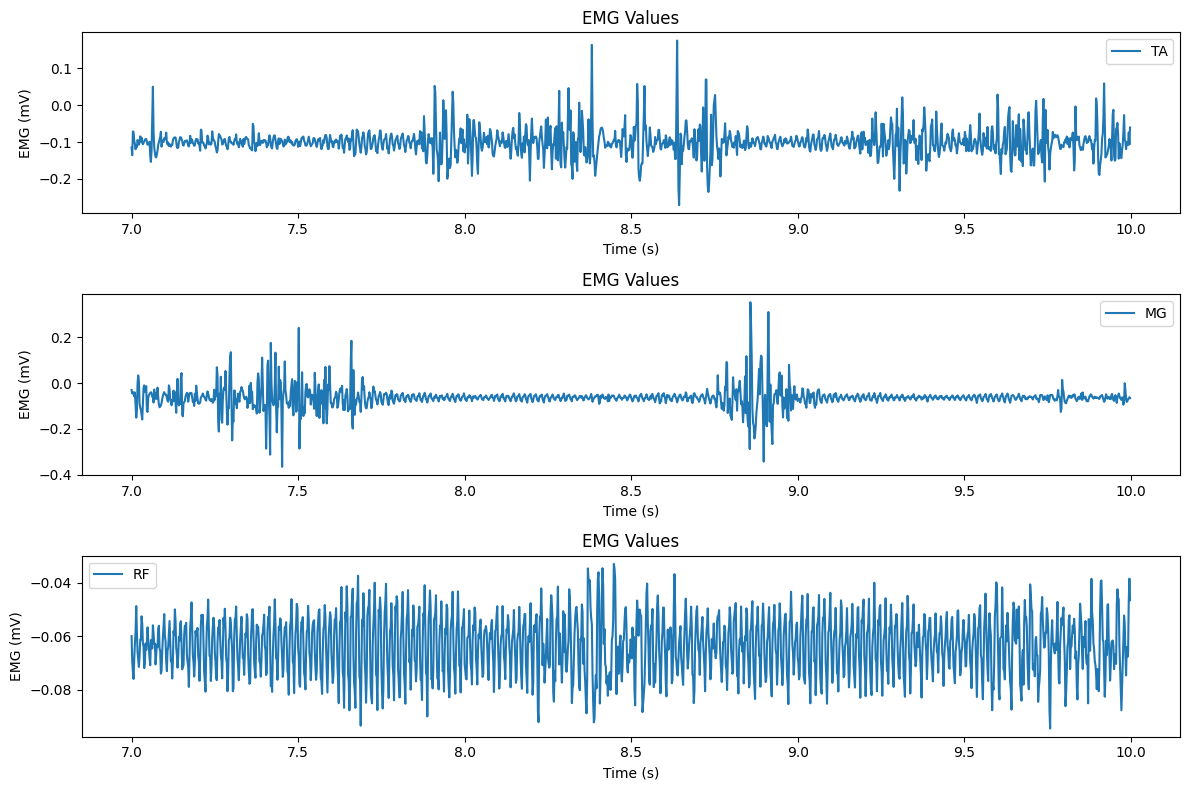

In [37]:
# Plot the EMG values as subplots
emg_ta = df_raw['TA'].values
emg_mg = df_raw['MG'].values
emg_rf = df_raw['RF'].values

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time_axis[window], emg_ta[window], label='TA')
plt.title('EMG Values')
plt.xlabel('Time (s)')
plt.ylabel('EMG (mV)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_axis[window], emg_mg[window], label='MG')
plt.title('EMG Values')
plt.xlabel('Time (s)')
plt.ylabel('EMG (mV)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_axis[window], emg_rf[window], label='RF')
plt.title('EMG Values')
plt.xlabel('Time (s)')
plt.ylabel('EMG (mV)')
plt.legend()

plt.tight_layout()
plt.show()